In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kl = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/kl.pt')
score_mse_err = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/score_mse_err.pt')
score_rel_err = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/score_rel_err.pt')
score_similarity = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/score_similarity.pt')
score_estimate_magnitude = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/score_estimate_magnitude.pt')
posterior_score_magnitude = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/posterior_score_magnitude.pt')

/tmp/ipykernel_13197/1352819067.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  kl = torch.load('/home/anguyenk/Documents/checkpoint_x0_no_clipped/kl.pt')
/tmp/ipykernel

In [3]:
kl_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_drop_010_grid_size_010_patch_size_64/kl.pt')
score_mse_err_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_drop_010_grid_size_010_patch_size_64/score_mse_err.pt')
score_rel_err_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_drop_010_grid_size_010_patch_size_64/score_rel_err.pt')
score_similarity_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_drop_010_grid_size_010_patch_size_64/score_similarity.pt')
score_estimate_magnitude_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_drop_010_grid_size_010_patch_size_64/score_estimate_magnitude.pt')
posterior_score_magnitude_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_drop_010_grid_size_010_patch_size_64/posterior_score_magnitude.pt')

/tmp/ipykernel_13197/84558562.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  kl_adaln = torch.load('/home/anguyenk/Documents/adaLN_epoch1599_grad_clip1_no_flash_attn_dr

In [4]:
T = np.arange(1000)

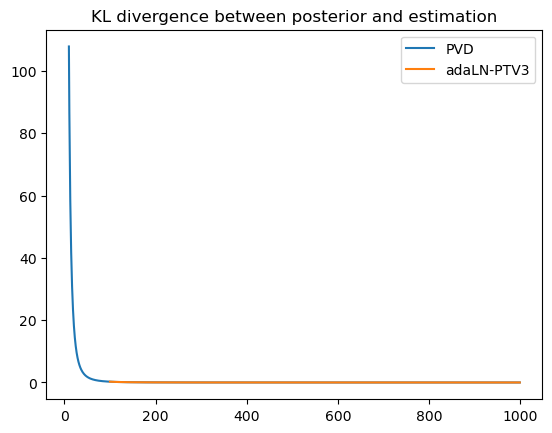

In [5]:
plt.plot(T[10:], kl[10:], label='PVD')
plt.plot(T[100:], kl_adaln[100:], label='adaLN-PTV3')
plt.title('KL divergence between posterior and estimation')
plt.legend()

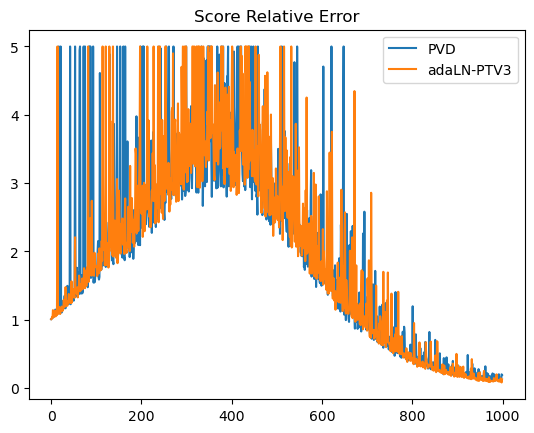

In [6]:
plt.plot(T, np.clip(score_rel_err, None, 5), label='PVD')
plt.plot(T, np.clip(score_rel_err_adaln, None, 5), label='adaLN-PTV3')
plt.title('Score Relative Error')
plt.legend()

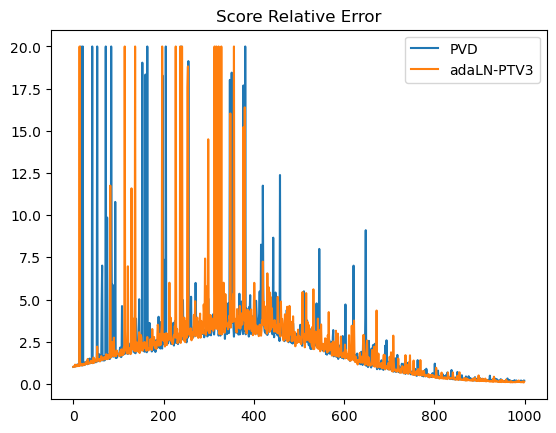

In [7]:
plt.plot(T, np.clip(score_rel_err, None, 20), label='PVD')
plt.plot(T, np.clip(score_rel_err_adaln, None, 20), label='adaLN-PTV3')
plt.title('Score Relative Error')
plt.legend()

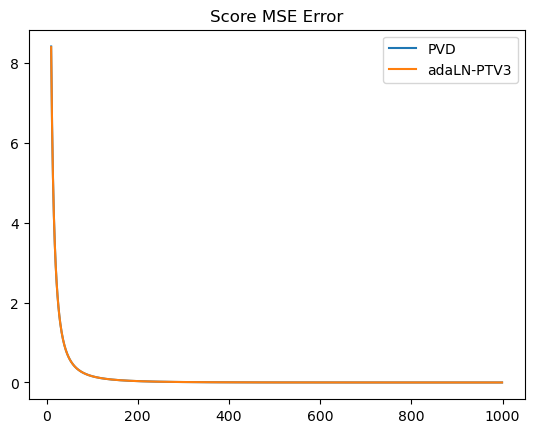

In [12]:
plt.plot(T[10:], score_mse_err[10:]/posterior_score_magnitude[10:], label='PVD')
plt.plot(T[10:], score_mse_err_adaln[10:]/posterior_score_magnitude_adaln[10:], label='adaLN-PTV3')
plt.title('Score MSE Error')
plt.legend()

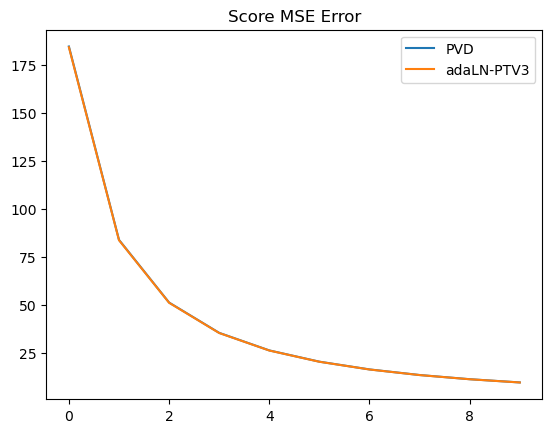

In [15]:
plt.plot(T[:10], score_mse_err[:10]/posterior_score_magnitude[:10], label='PVD')
plt.plot(T[:10], score_mse_err_adaln[:10]/posterior_score_magnitude_adaln[:10], label='adaLN-PTV3')
plt.title('Score MSE Error')
plt.legend()

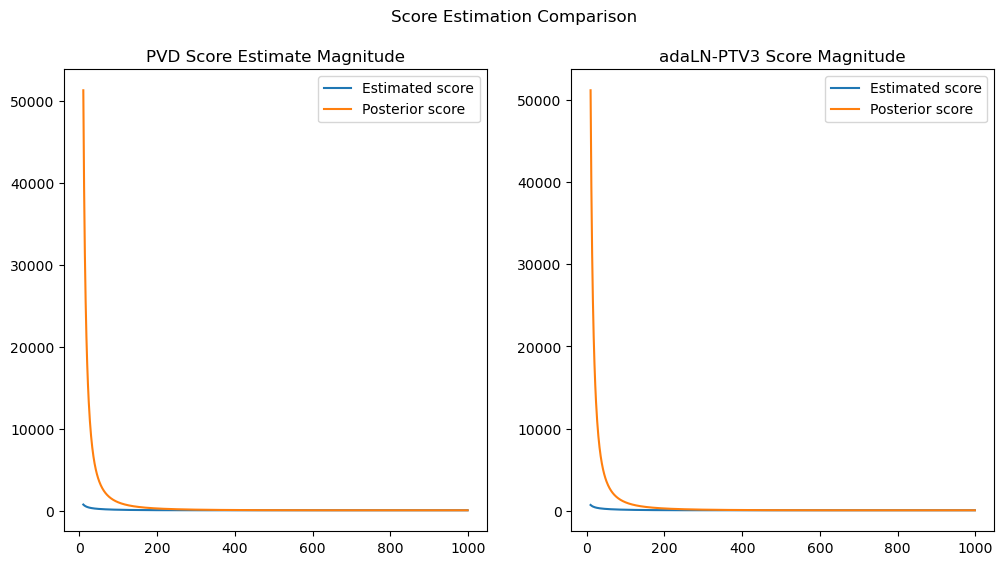

In [18]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot for PVD
axes[0].plot(T[10:], score_estimate_magnitude[10:], label='Estimated score')
axes[0].plot(T[10:], posterior_score_magnitude[10:], label='Posterior score')
axes[0].set_title('PVD Score Estimate Magnitude')
axes[0].legend()

# Second plot for adaLN-PTV3
axes[1].plot(T[10:], score_estimate_magnitude_adaln[10:], label='Estimated score')
axes[1].plot(T[10:], posterior_score_magnitude_adaln[10:], label='Posterior score')
axes[1].set_title('adaLN-PTV3 Score Magnitude')
axes[1].legend()

# Add a main title to the figure
fig.suptitle('Score Estimation Comparison')

# Display the plots
plt.show()


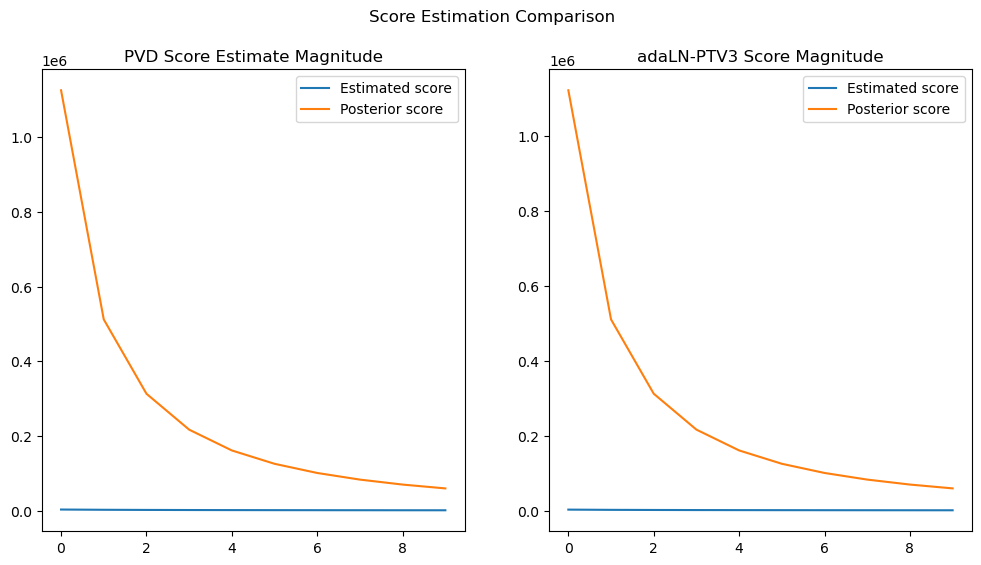

In [25]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot for PVD
axes[0].plot(T[:10], score_estimate_magnitude[:10], label='Estimated score')
axes[0].plot(T[:10], posterior_score_magnitude[:10], label='Posterior score')
axes[0].set_title('PVD Score Estimate Magnitude')
axes[0].legend()

# Second plot for adaLN-PTV3
axes[1].plot(T[:10], score_estimate_magnitude_adaln[:10], label='Estimated score')
axes[1].plot(T[:10], posterior_score_magnitude_adaln[:10], label='Posterior score')
axes[1].set_title('adaLN-PTV3 Score Magnitude')
axes[1].legend()

# Add a main title to the figure
fig.suptitle('Score Estimation Comparison')

# Display the plots
plt.show()

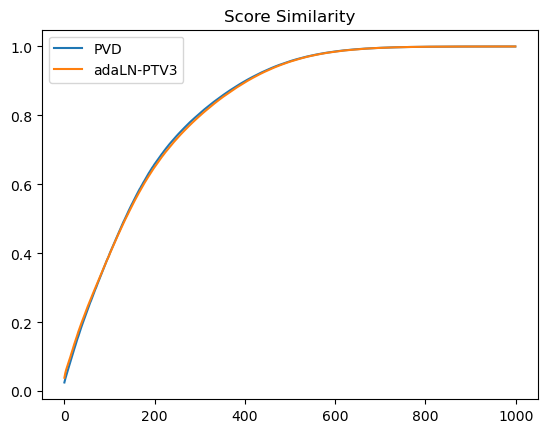

In [19]:
plt.plot(T, score_similarity, label='PVD')
plt.plot(T, score_similarity_adaln, label='adaLN-PTV3')
plt.title('Score Similarity')
plt.legend()